<a href="https://colab.research.google.com/github/AkashKarthikeyan/IPL_T20_Analysis_EDA_Capstone_Project/blob/main/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# players_ex = pd.read_excel(path + 'Players.xlsx')
# players_ex.to_csv (r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/IPL T20 Cricket Analysis - EDA/Players.csv', index = None, header=True)

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/IPL T20 Cricket Analysis - EDA/Data/'
deliveries_df = pd.read_csv(path + 'deliveries.csv')
matches_df = pd.read_csv(path + 'matches.csv')
players_df = pd.read_csv(path + 'Players.csv')
player_stats_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teams_df = pd.read_csv(path + 'teams.csv')
teams_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [5]:
print(deliveries_df.shape,matches_df.shape,players_df.shape,player_stats_df.shape,teams_df.shape,teams_home_and_away_df.shape)

(179078, 21) (756, 18) (566, 5) (516, 6) (15, 1) (14, 7)


# **Removal and handling of missing values and NaNs on DataFrames:**

## **Deliveries DataFrame:** 

In [6]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

From the above info, we know that the NaN values are present in the player_dismissed,dismissal_kind and fielder Series. So, we need to clean the data by removing the NaNs.


*  Since no players are dismissed on the other deliveries, it is intuitive to fill the nan values with 0 as it determines that there are no dismissals on the particular delivery.
*   For the deliveries which fetched the wickets by bowled, lbw and hit wicket, there won't be any fielder involved so that these fields are also filled with 0s.




In [8]:
deliveries_df.fillna(0,inplace=True)

In [9]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


## **Matches DataFrame:** 

In [11]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
seasons_list = sorted(list(dict(matches_df.Season.value_counts()).keys()))

In [13]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

We can see that the columns like city, winner, player of the match, umpire1, umpire2 and umpire3 contain some NaN values.


In [14]:
matches_df[matches_df['city'].isna()==True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


By web scraping, it is found that all the NaN values of cities can be replaced by Dubai International Stadium or simply as Dubai.

In [15]:
matches_df.Season.value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2010    60
IPL-2018    60
IPL-2014    60
IPL-2016    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [16]:
matches_df['city'].replace(np.nan,'Dubai',inplace=True)

In [17]:
matches_df[matches_df['city'].isna()==True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [18]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Winner and player of the match:

In [19]:
matches_df[matches_df['winner'].isna()==True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


As the matches has no result, there will be no winners and no player of the match. In this scenario, we can replace the winner and player of the match with **NaN** to **Not declared** as it would be more intuitive.

In [20]:
matches_df['winner'].replace(np.nan, 'Not Declared', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [21]:
matches_df['player_of_match'].replace(np.nan, 'Not Declared', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
matches_df[matches_df['umpire1'].isna()==True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [23]:
matches_df.iloc[4,matches_df.columns.get_loc('umpire1')] = 'Sundaram Ravi'
matches_df.iloc[4,matches_df.columns.get_loc('umpire2')] = 'Virendar Sharma'
matches_df.iloc[753,matches_df.columns.get_loc('umpire1')] = 'Sundaram Ravi'
matches_df.iloc[753,matches_df.columns.get_loc('umpire2')] = 'Bruce Oxenford'

In [24]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          119 non-null    ob

In [25]:
matches_df[matches_df['umpire3'].isna()==True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virendar Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,IPL-2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,IPL-2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,IPL-2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


Since we need to call an **API** to **GET** the third umpire of all the matches. We are dropping the third column for the sake of simplicity and the API call function is out of scope for this project. 

In [26]:
matches_df.drop('umpire3',axis=1,inplace=True)

In [27]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

## **Players DataFrame:**

In [28]:
players_df = pd.read_csv(path + 'Players.csv')

In [29]:
pd.set_option('display.max_rows', None)
players_df.head(10)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaN,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaN,Right_Hand,Right-arm offbreak,NaN
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England
6,A Hales,NaN,Right_hand,NaN,NaN
7,A Joseph,NaN,Right_Hand,Right-arm fast,NaN
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India
9,A Mishra,1982-11-24,Right_Hand,Legbreak,India


In [30]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            471 non-null    object
 2   Batting_Hand   563 non-null    object
 3   Bowling_Skill  502 non-null    object
 4   Country        471 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


We have NaN values in DOB, Batting_Hand, Bowling_Skill and Country.

In [31]:
players_df[players_df['Batting_Hand'].isna()==True]

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
197,J Dala,NaN,NaN,Right-arm Medium,NaN
440,S Midhun,NaN,NaN,Legbreak,NaN
520,Tejas Baroka,NaN,NaN,Legbreak googly,NaN


In [32]:
players_df.iloc[197,players_df.columns.get_loc('Batting_Hand')] = 'Right_Hand'
players_df.iloc[440,players_df.columns.get_loc('Batting_Hand')] = 'Right_Hand'
players_df.iloc[520,players_df.columns.get_loc('Batting_Hand')] = 'Right_Hand'

In [33]:
players_df['Bowling_Skill'].replace(np.nan,"Doesn't bowl",inplace=True)

In [34]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            471 non-null    object
 2   Batting_Hand   566 non-null    object
 3   Bowling_Skill  566 non-null    object
 4   Country        471 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


In [35]:
players_df.describe()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,566,566,471
unique,566,457,3,17,11
top,T Curran,1987-04-30,Right_Hand,Right-arm medium,India
freq,1,3,376,107,264


In [36]:
players_df['dob'] = pd.to_datetime(players_df['DOB'], errors='coerce')
players_df.dtypes

Player_Name              object
DOB                      object
Batting_Hand             object
Bowling_Skill            object
Country                  object
dob              datetime64[ns]
dtype: object

In [37]:
now = pd.to_datetime('now')
players_df['Age'] = (now - players_df['dob']).astype('<m8[Y]')

In [38]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,dob,Age
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,1991-02-24,30.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,1983-12-05,37.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,1977-09-19,43.0
3,A Choudhary,NaN,Right_hand,Left-arm fast-medium,NaN,NaT,NaN
4,A Dananjaya,NaN,Right_Hand,Right-arm offbreak,NaN,NaT,NaN


In [39]:
players_df['Age'].mean()

36.14225053078556

In [40]:
mean_dob = '1985-01-01' #since the mean age is taken as 36, the dob is set to a constant value for the sake of sanity

In [41]:
for i in players_df.loc[pd.isna(players_df["DOB"]), :].index:
  players_df['DOB'].iloc[i] = mean_dob

In [42]:
players_df.drop(['Age','dob'],axis=1,inplace=True)

In [43]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            566 non-null    object
 2   Batting_Hand   566 non-null    object
 3   Bowling_Skill  566 non-null    object
 4   Country        471 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


In [44]:
players_country_dict = dict(players_df['Country'].value_counts())
new_players_country_dict = dict([(value, key) for key, value in players_country_dict.items()])
new_players_country_dict

{1: 'Netherlands',
 2: 'Zimbabwea',
 5: 'Bangladesh',
 13: 'Pakistan',
 14: 'England',
 19: 'West Indies',
 20: 'Sri Lanka',
 22: 'New Zealand',
 39: 'South Africa',
 72: 'Australia',
 264: 'India'}

In [45]:
players_ratio = list(new_players_country_dict.keys())/sum(list(players_country_dict.values()))
country_fillna = players_ratio * len(list(players_df[players_df['Country'].isna()==True].Country))
ints = [int(round(item,0)) for item in country_fillna]
print(ints)
print(list(new_players_country_dict.values()))

[53, 15, 8, 4, 4, 4, 3, 3, 1, 0, 0]
['India', 'Australia', 'South Africa', 'New Zealand', 'Sri Lanka', 'West Indies', 'England', 'Pakistan', 'Bangladesh', 'Zimbabwea', 'Netherlands']


In [46]:
counter = 0
for i in players_df.loc[pd.isna(players_df["Country"]), :].index:
  counter += 1
  if counter<54:
    players_df['Country'].iloc[i] = 'India'
  elif counter>53 and counter<69:
    players_df['Country'].iloc[i] = 'Australia'
  elif counter>68 and counter<77:
    players_df['Country'].iloc[i] = 'South Africa'
  elif counter>76 and counter<81:
    players_df['Country'].iloc[i] = 'New Zealand'
  elif counter>80 and counter<85:
    players_df['Country'].iloc[i] = 'Sri Lanka'
  elif counter>84 and counter<89:
    players_df['Country'].iloc[i] = 'West Indies'
  elif counter>88 and counter<92:
    players_df['Country'].iloc[i] = 'England'
  elif counter>91 and counter<95:
    players_df['Country'].iloc[i] = 'Pakistan'
  elif counter>94:
    players_df['Country'].iloc[i] = 'Bangladesh'

In [47]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            566 non-null    object
 2   Batting_Hand   566 non-null    object
 3   Bowling_Skill  566 non-null    object
 4   Country        566 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


### Calling API for getting the DOB info:

As the DOB of almost 95 players are missing, we call an API to get the DOB of the players.

In [48]:
import requests
Player_Name= 119
api_url = f"https://rest.entitysport.com/v2/players/{Player_Name}?token=ec471071441bb2ac538a0ff901abd249"
data = requests.get(api_url).json()
data

{'api_version': '2.0',
 'datetime': '2021-07-15 08:34:17',
 'etag': 'a094fc5ba25b52c877d13aa8b0aab3c7',
 'modified': '2021-07-15 08:34:17',
 'response': {'player': {'batting_style': 'Right Hand Bat',
   'birthdate': '1988-11-05',
   'birthplace': 'Delhi',
   'bowling_style': 'Right Arm Medium',
   'country': 'in',
   'fantasy_player_rating': 10.5,
   'fielding_position': '',
   'first_name': 'Virat Kohli',
   'last_name': '',
   'logo_url': '',
   'middle_name': '',
   'nationality': 'India',
   'pid': 119,
   'playing_role': 'bat',
   'primary_team': [],
   'recent_appearance': 0,
   'recent_match': 0,
   'short_name': 'Virat Kohli',
   'thumb_url': '',
   'title': 'Virat Kohli'}},
 'status': 'ok'}

In [49]:
import requests
Player_Name= 119
api_url = f"https://rest.entitysport.com/v2/players?country=in&token=ec471071441bb2ac538a0ff901abd249"
data = requests.get(api_url).json()
data

{'api_version': '2.0',
 'response': "Sorry, you don't have access to the requested api",
 'status': 'forbidden'}

## **Players Stats Dataframe:**

In [50]:
player_stats_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [51]:
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [52]:
player_stats_df[player_stats_df['average'].isna()==True]

,batsman,total_runs,out,numberofballs,average,strikerate
359,H Brar,20,0,12,NaN,166.666667
366,P Sahu,19,0,13,NaN,146.153846
386,A Joseph,15,0,13,NaN,115.384615
398,DAJ Bracewell,12,0,9,NaN,133.333333
400,AR Bawne,12,0,12,NaN,100.000000
403,K Upadhyay,12,0,9,NaN,133.333333
418,SM Harwood,9,0,13,NaN,69.230769
433,I Malhotra,7,0,4,NaN,175.000000
436,DM Bravo,6,0,5,NaN,120.000000
437,SS Shaikh,6,0,7,NaN,85.714286


In [53]:
for i in player_stats_df.loc[pd.isna(player_stats_df["average"]), :].index:
  player_stats_df['average'].iloc[i] = player_stats_df['total_runs'].iloc[i]

In [54]:
player_stats_df[player_stats_df['average'].isna()==True]

,batsman,total_runs,out,numberofballs,average,strikerate


In [55]:
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        516 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


## **Teams Dataframe:**

In [56]:
teams_df.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [57]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


## **Teams home and away Dataframe:**

In [58]:
teams_home_and_away_df.head(14)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [59]:
teams_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


# **Data Correlation and Trends:** 

## **With the data from the above six dataframes, we can get different statistics:** 






### **By Teams:** 

**1.Highest Runs:** 

In [60]:
Highest_runs = deliveries_df.groupby(['batting_team'])['total_runs'].sum()
type(Highest_runs)
Highest_runs_df = Highest_runs.to_frame().reset_index()
Highest_runs_df = Highest_runs_df.rename(columns= {0: 'total_runs'})
Highest_runs_df.sort_values(by=['total_runs'],inplace=True,ascending=False,ignore_index=True)
Highest_runs_df

,batting_team,total_runs
0,Mumbai Indians,29809
1,Royal Challengers Bangalore,28126
2,Kings XI Punjab,27893
3,Kolkata Knight Riders,27419
4,Chennai Super Kings,26418
5,Delhi Daredevils,24388
6,Rajasthan Royals,22431
7,Sunrisers Hyderabad,17059
8,Deccan Chargers,11463
9,Pune Warriors,6358


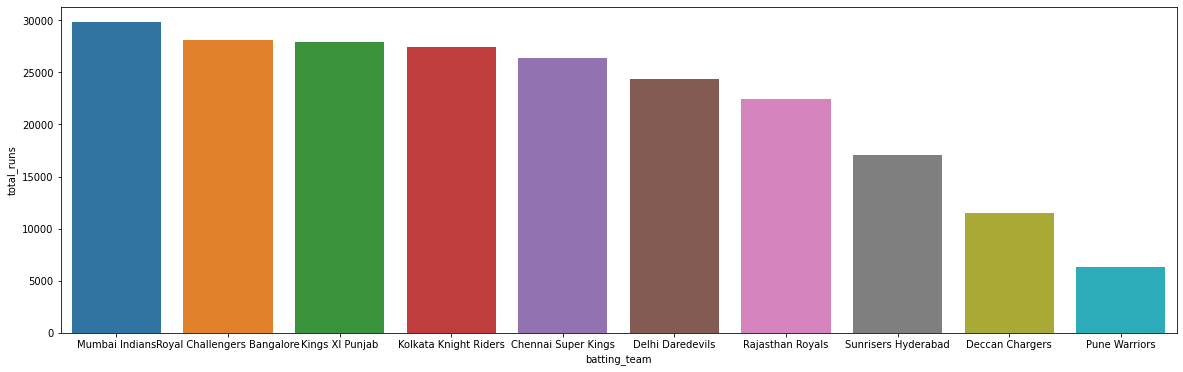

In [61]:
plt.figure(figsize=(20,6))
sns.barplot(x=Highest_runs_df['batting_team'].head(10),y=Highest_runs_df['total_runs'])

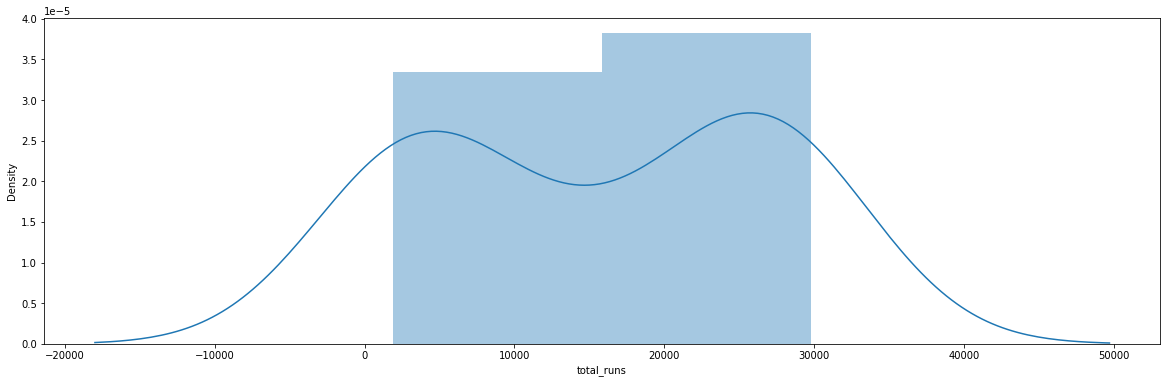

In [62]:
plt.figure(figsize=(20,6))
sns.distplot(Highest_runs_df['total_runs'])

**2. Lowest runs:** 

In [63]:
Lowest_runs = deliveries_df.groupby(['batting_team'])['total_runs'].sum()
Lowest_runs_df = Lowest_runs.to_frame().reset_index()
Lowest_runs_df = Lowest_runs_df.rename(columns= {0: 'total_runs'})
Lowest_runs_df.sort_values(by=['total_runs'],inplace=True,ascending=True,ignore_index=True)
Lowest_runs_df

,batting_team,total_runs
0,Kochi Tuskers Kerala,1901
1,Rising Pune Supergiants,2063
2,Rising Pune Supergiant,2470
3,Delhi Capitals,2630
4,Gujarat Lions,4862
5,Pune Warriors,6358
6,Deccan Chargers,11463
7,Sunrisers Hyderabad,17059
8,Rajasthan Royals,22431
9,Delhi Daredevils,24388


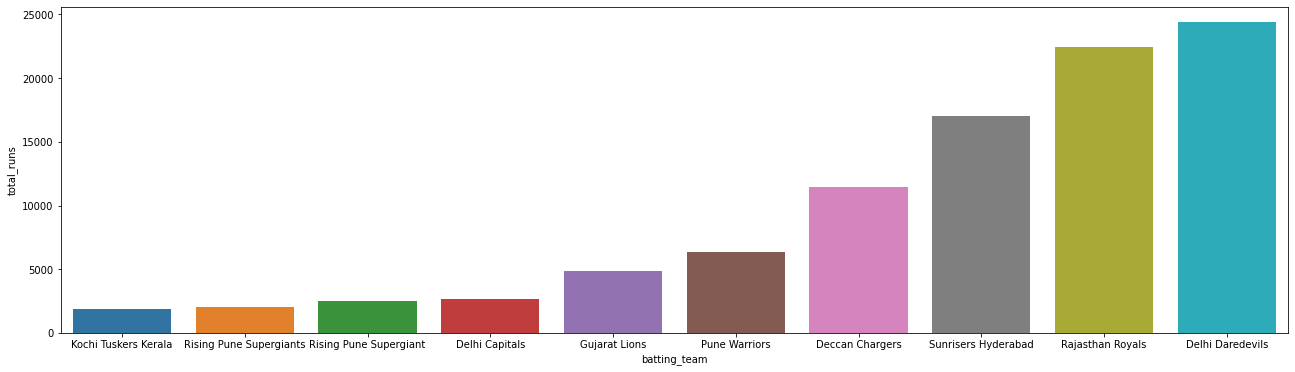

In [64]:
plt.figure(figsize=(22,6))
sns.barplot(x=Lowest_runs_df['batting_team'].head(10),y=Lowest_runs_df['total_runs'])

**3. Most Wins:**

In [65]:
teams_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [66]:
teams_home_and_away_df['total_wins'] = teams_home_and_away_df['away_wins'] + teams_home_and_away_df['home_wins']

In [67]:
Most_wins = teams_home_and_away_df[['team','total_wins']]
Most_wins.sort_values(by=['total_wins'],inplace=True,ascending=False,ignore_index=True)
Most_wins

,team,total_wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


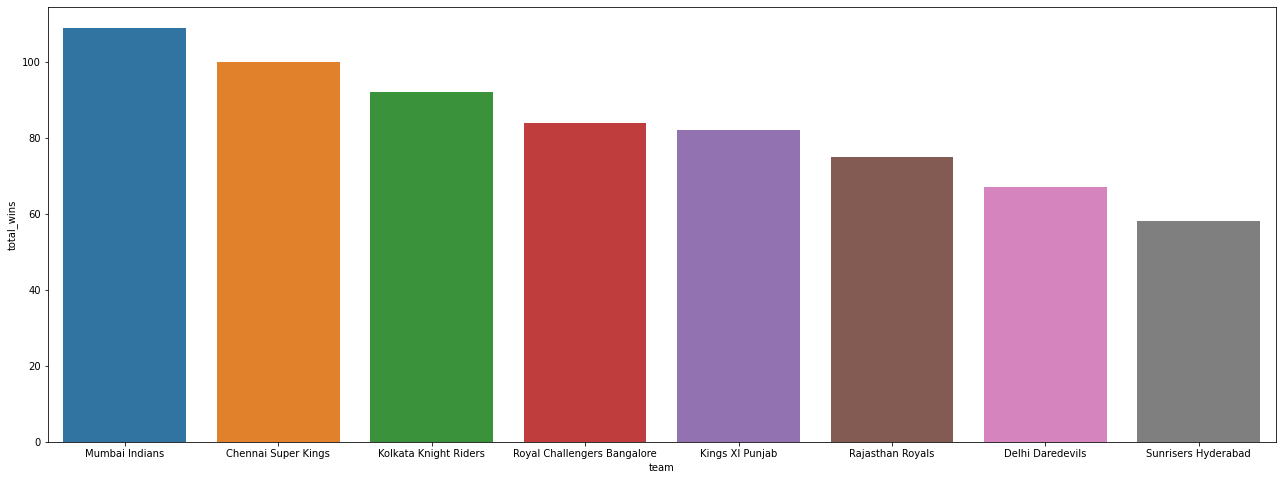

In [68]:
plt.figure(figsize=(22,8))
sns.barplot(x=Most_wins['team'].head(8),y=Most_wins['total_wins'])

Text(0.5, 0, 'Team')

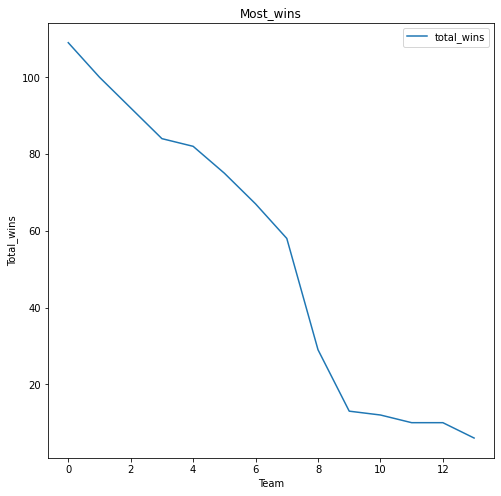

In [69]:
Most_wins.plot(figsize=(8,8))

plt.title('Most_wins')
plt.ylabel('Total_wins')
plt.xlabel('Team')

**4. Least Wins:**

In [70]:
Least_wins = teams_home_and_away_df[['team','total_wins']]
Least_wins.sort_values(by=['total_wins'],inplace=True,ascending=True,ignore_index=True)
Least_wins

,team,total_wins
0,Kochi Tuskers Kerala,6
1,Rising Pune Supergiant,10
2,Delhi Capitals,10
3,Pune Warriors,12
4,Gujarat Lions,13
5,Deccan Chargers,29
6,Sunrisers Hyderabad,58
7,Delhi Daredevils,67
8,Rajasthan Royals,75
9,Kings XI Punjab,82


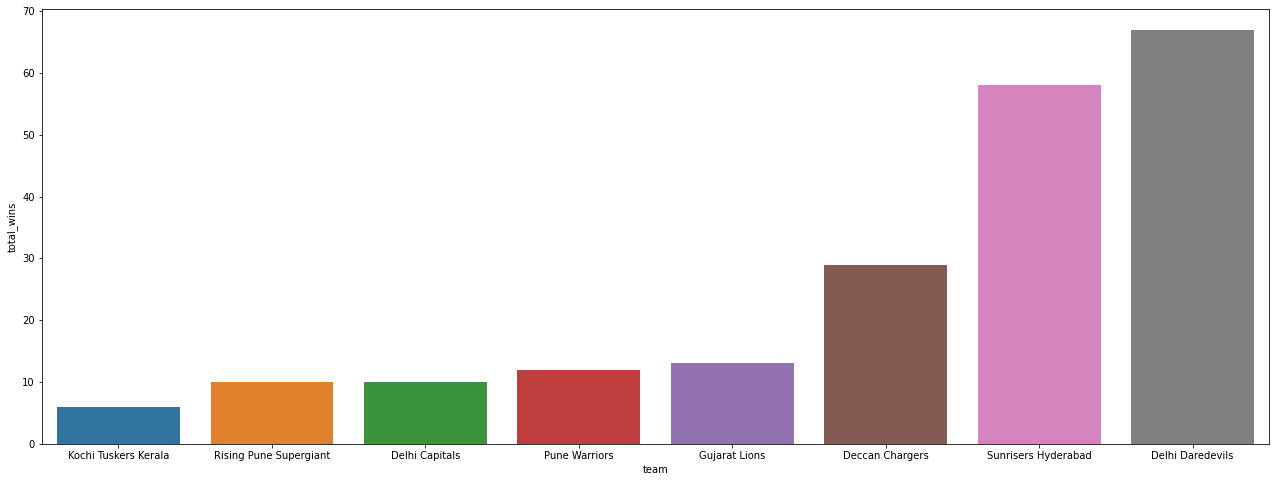

In [71]:
plt.figure(figsize=(22,8))
sns.barplot(x=Least_wins['team'].head(8),y=Least_wins['total_wins'])

Text(0.5, 0, 'Team')

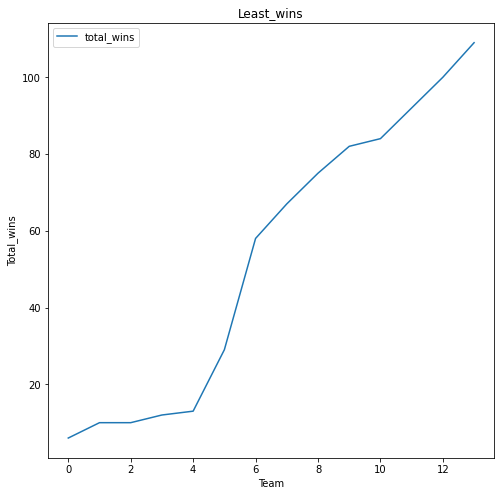

In [72]:
Least_wins.plot(figsize=(8,8))

plt.title('Least_wins')
plt.ylabel('Total_wins')
plt.xlabel('Team')

**5. Most Winning Percentage:** 

In [73]:
teams_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_wins
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,10
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,109
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333,100
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,10
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222,58


In [74]:
teams_home_and_away_df['total_win_percentage'] = (teams_home_and_away_df['home_win_percentage'] + teams_home_and_away_df['away_win_percentage'])/2

In [75]:
Most_winning_percentage = teams_home_and_away_df[['team','total_win_percentage']]
Most_winning_percentage.sort_values(by=['total_win_percentage'],inplace=True,ascending=False,ignore_index=True)
Most_winning_percentage

,team,total_win_percentage
0,Rising Pune Supergiant,62.500000
1,Chennai Super Kings,61.318352
2,Delhi Capitals,60.000000
3,Mumbai Indians,58.364034
4,Sunrisers Hyderabad,54.920635
5,Kolkata Knight Riders,51.008244
6,Rajasthan Royals,50.391791
7,Kings XI Punjab,46.761474
8,Royal Challengers Bangalore,46.377709
9,Kochi Tuskers Kerala,42.857143


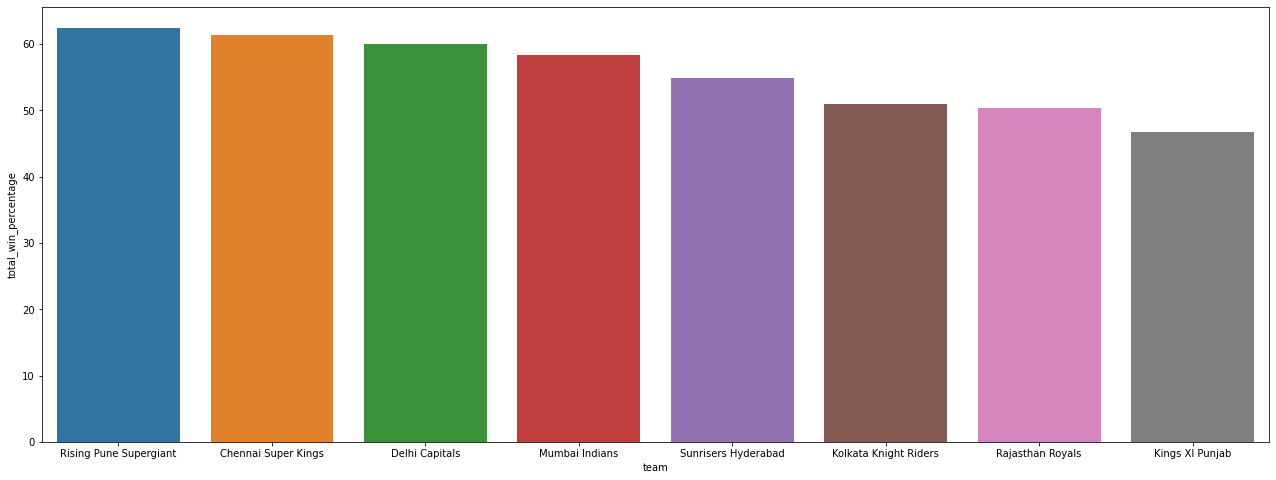

In [76]:
plt.figure(figsize=(22,8))
sns.barplot(x=Most_winning_percentage['team'].head(8),y=Most_winning_percentage['total_win_percentage'])

Text(0.5, 0, 'Team')

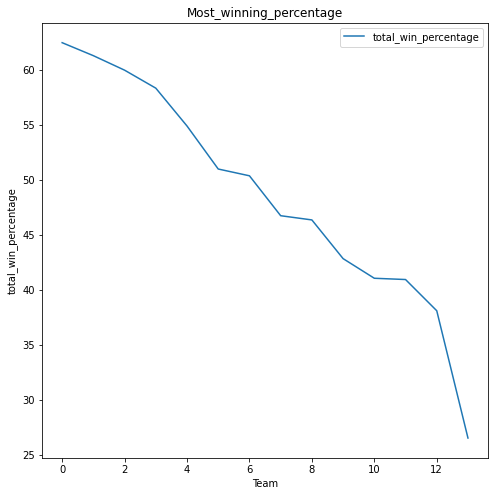

In [77]:
Most_winning_percentage.plot(figsize=(8,8))

plt.title('Most_winning_percentage')
plt.ylabel('total_win_percentage')
plt.xlabel('Team')

**6. Least Winning Percentage:** 

In [78]:

Least_winning_percentage = teams_home_and_away_df[['team','total_win_percentage']]
Least_winning_percentage.sort_values(by=['total_win_percentage'],inplace=True,ascending=True,ignore_index=True)
Least_winning_percentage

,team,total_win_percentage
0,Pune Warriors,26.538462
1,Deccan Chargers,38.117733
2,Delhi Daredevils,40.956617
3,Gujarat Lions,41.071429
4,Kochi Tuskers Kerala,42.857143
5,Royal Challengers Bangalore,46.377709
6,Kings XI Punjab,46.761474
7,Rajasthan Royals,50.391791
8,Kolkata Knight Riders,51.008244
9,Sunrisers Hyderabad,54.920635


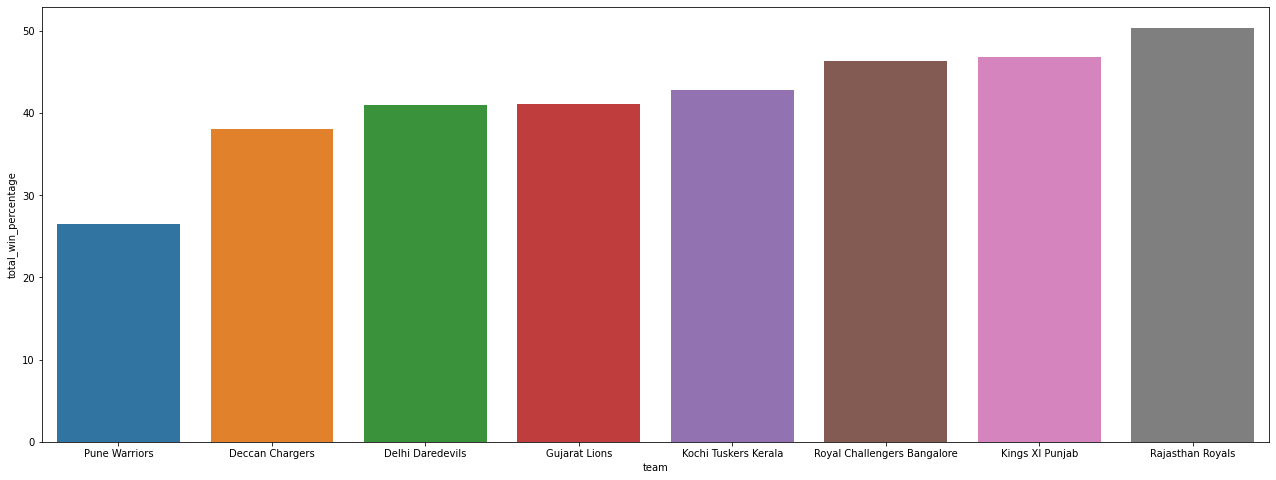

In [79]:
plt.figure(figsize=(22,8))
sns.barplot(x=Least_winning_percentage['team'].head(8),y=Least_winning_percentage['total_win_percentage'])

Text(0.5, 0, 'Team')

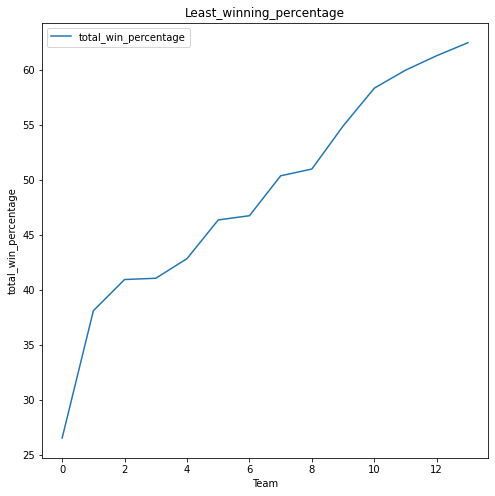

In [80]:
Least_winning_percentage.plot(figsize=(8,8))

plt.title('Least_winning_percentage')
plt.ylabel('total_win_percentage')
plt.xlabel('Team')

### **By Players:** 

**1.Most runs:** 

In [81]:
player_stats_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [82]:
Most_runs = player_stats_df[['batsman','total_runs']]
Most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   batsman     516 non-null    object
 1   total_runs  516 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


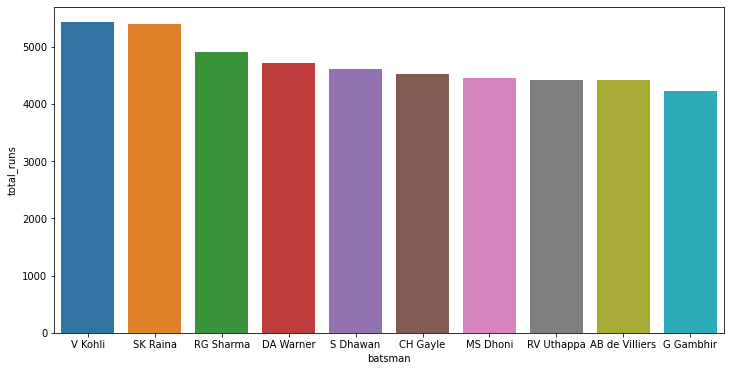

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x=Most_runs['batsman'].head(10),y=Most_runs['total_runs'])

**2.Most Sixes:** 

In [84]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [85]:
sixes_df = deliveries_df[deliveries_df['batsman_runs']==6]
sixes_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6,0,0,0
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,0,0,0,0,0,6,0,6,0,0,0
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,0,0,0,0,0,6,0,6,0,0,0
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,0,0,0,0,0,6,0,6,0,0,0
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,0,0,0,0,0,6,0,6,0,0,0


In [86]:
Most_sixes = sixes_df.groupby(['batsman'])['batsman_runs'].sum()
Most_sixes_df = Most_sixes.to_frame().reset_index()
Most_sixes_df = Most_sixes_df.rename(columns= {'batsman_runs': 'Number_of_sixes'})
Most_sixes_df.sort_values(by=['Number_of_sixes'],inplace=True,ascending=False,ignore_index=True)
Most_sixes_df.head()

,batsman,Number_of_sixes
0,CH Gayle,1962
1,AB de Villiers,1284
2,MS Dhoni,1242
3,SK Raina,1170
4,RG Sharma,1164


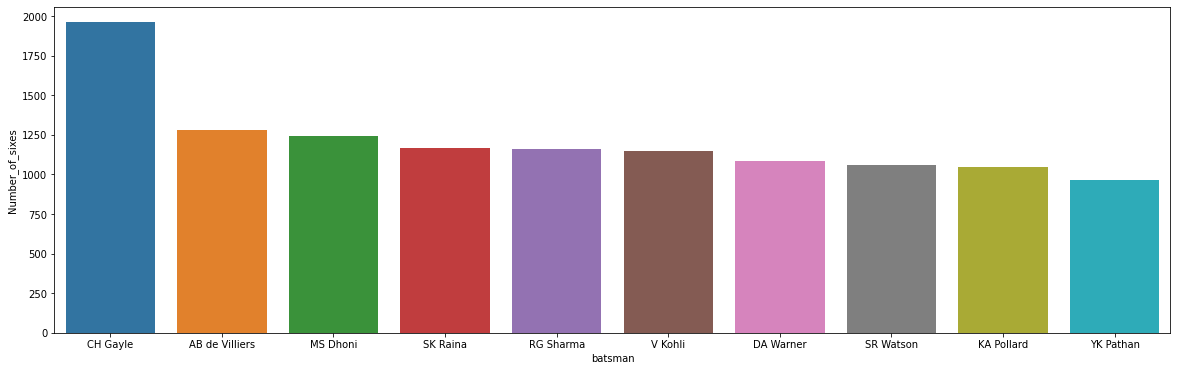

In [87]:
plt.figure(figsize=(20,6))
sns.barplot(x=Most_sixes_df['batsman'].head(10),y=Most_sixes_df['Number_of_sixes'])

**3.Most Fours:**  

In [88]:
fours_df = deliveries_df[deliveries_df['batsman_runs']==4]
Most_fours = fours_df.groupby(['batsman'])['batsman_runs'].sum()
Most_fours_df = Most_fours.to_frame().reset_index()
Most_fours_df = Most_fours_df.rename(columns= {'batsman_runs': 'Number_of_fours'})
Most_fours_df.sort_values(by=['Number_of_fours'],inplace=True,ascending=False,ignore_index=True)
Most_fours_df.head()

,batsman,Number_of_fours
0,S Dhawan,2104
1,SK Raina,1980
2,G Gambhir,1968
3,V Kohli,1928
4,DA Warner,1836


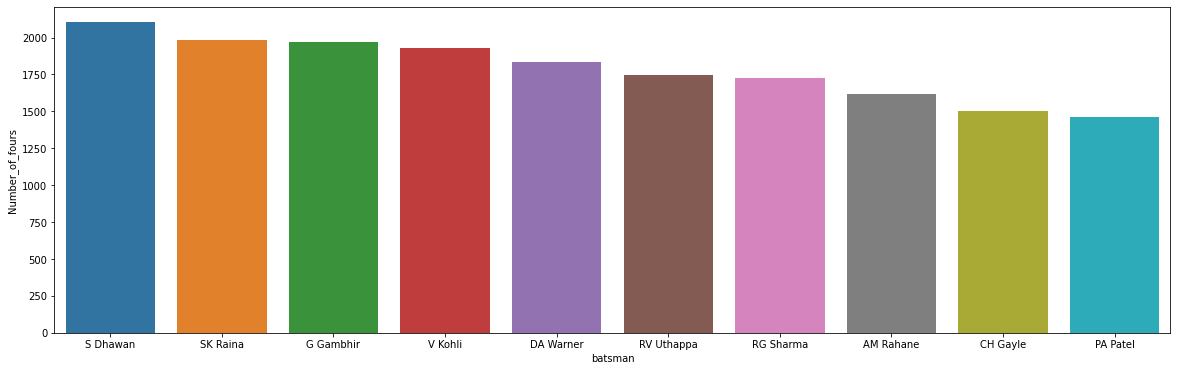

In [89]:

plt.figure(figsize=(20,6))
sns.barplot(x=Most_fours_df['batsman'].head(10),y=Most_fours_df['Number_of_fours'])

**4. Highest Strike Rate:** 

In [90]:
player_stats_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [91]:
more_than_100_balls = player_stats_df[player_stats_df['numberofballs']>100]
Highest_strike_rate = more_than_100_balls[['batsman','strikerate']]
Highest_strike_rate.sort_values(by=['strikerate'],inplace=True,ascending=False,ignore_index=True)
Highest_strike_rate.head()

,batsman,strikerate
0,AD Russell,188.164894
1,SP Narine,171.397380
2,M Ali,170.621469
3,BCJ Cutting,169.503546
4,CR Brathwaite,165.454545


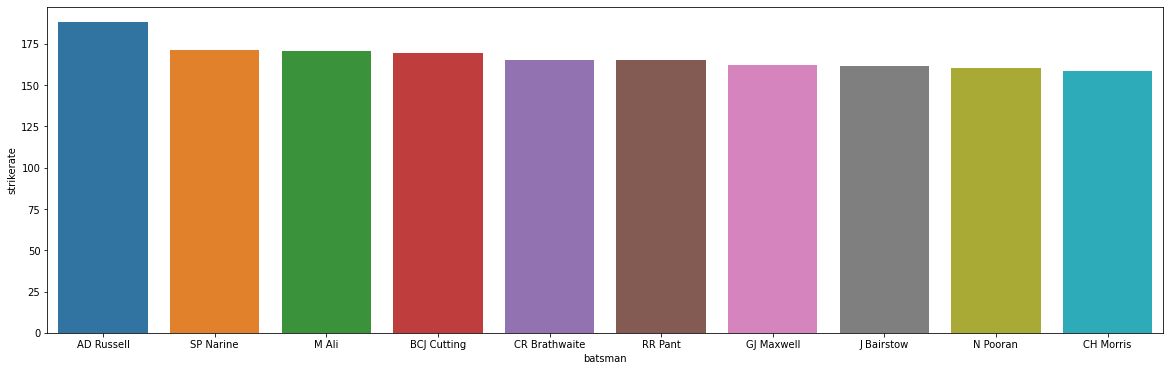

In [92]:
plt.figure(figsize=(20,6))
sns.barplot(x=Highest_strike_rate['batsman'].head(10),y=Highest_strike_rate['strikerate'])

**5.Highest Average:** 

In [93]:
more_than_5_outs = player_stats_df[player_stats_df['out']>5]
Highest_average = more_than_5_outs[['batsman','average']]
Highest_average.sort_values(by=['average'],inplace=True,ascending=False,ignore_index=True)
Highest_average.head()

,batsman,average
0,J Bairstow,57.375000
1,HM Amla,44.384615
2,AB de Villiers,42.442308
3,JP Duminy,41.448980
4,DA Warner,41.377193


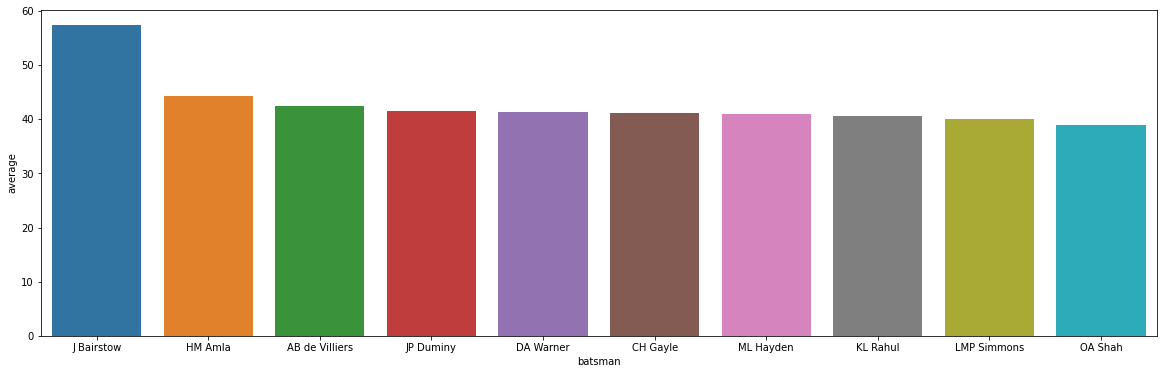

In [94]:
plt.figure(figsize=(20,6))
sns.barplot(x=Highest_average['batsman'].head(10),y=Highest_average['average'])